In [ ]:
import requests
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

INTERIM_PATH="data/interim/ENIGH"

In [46]:
df_2022=pd.read_csv(f"{INTERIM_PATH}/2022.csv")
df_2020=pd.read_csv(f"{INTERIM_PATH}/2020.csv")
df_2018=pd.read_csv(f"{INTERIM_PATH}/2018.csv")
df_2016=pd.read_csv(f"{INTERIM_PATH}/2016.csv")

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_1973/1701187055.py:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv("datos_finales/2022.csv")
/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_1973/1701187055.py:2: DtypeWarning: Columns (11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020=pd.read_csv("datos_finales/2020.csv")


# Gráficas

In [50]:
def en_sonora(df):
    en_sonora= (df['folioviv']>=2600000000)&(df['folioviv']<2700000000)
    return en_sonora

def casados(df):
    if isinstance(df['edo_conyug'], (int, float, complex)):
        casados=df['edo_conyug']==2
    else:
        casados=df['edo_conyug']=='2'
    return casados

def divorciados(df):
    if isinstance(df['edo_conyug'], (int, float, complex)):
        divorciados=df['edo_conyug']==4
    else:
        divorciados=df['edo_conyug']=='4'
    return divorciados 



In [42]:
print(f"Cantidad de registros en sonora en 2016: {len(df_2016[en_sonora(df_2016)])}")
print(f"Cantidad de registros en sonora en 2018: {len(df_2018[en_sonora(df_2018)])}")
print(f"Cantidad de registros en sonora en 2020: {len(df_2020[en_sonora(df_2020)])}")
print(f"Cantidad de registros en sonora en 2022: {len(df_2022[en_sonora(df_2022)])}")

Cantidad de registros en sonora en 2016: 184
Cantidad de registros en sonora en 2018: 79
Cantidad de registros en sonora en 2020: 155
Cantidad de registros en sonora en 2022: 12332


In [43]:
df_2016.integrantes.unique()

array([ 4,  2,  7,  6,  3,  1,  8,  5,  9, 15, 11, 12, 10])

## Ingreso individual por generación 

### 2016

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/433710279.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)['ing_tri_individual_total'].mean()


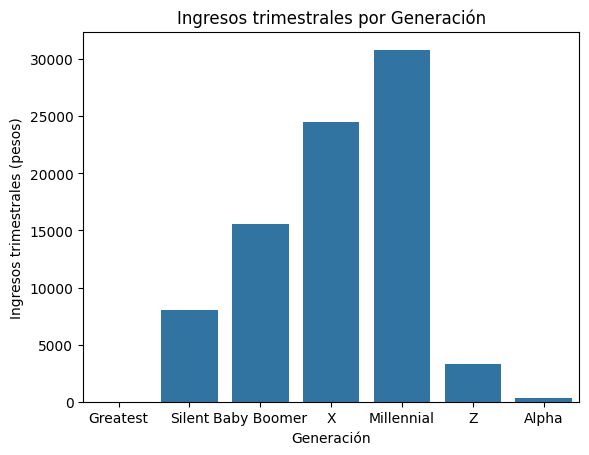

In [265]:
df=df_2016[en_sonora(df_2016)]
generacion=df.groupby('generacion',as_index=False)['ing_tri_individual_total'].mean()
sns.barplot(x='generacion', y='ing_tri_individual_total', data=generacion)

# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/4264725152.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


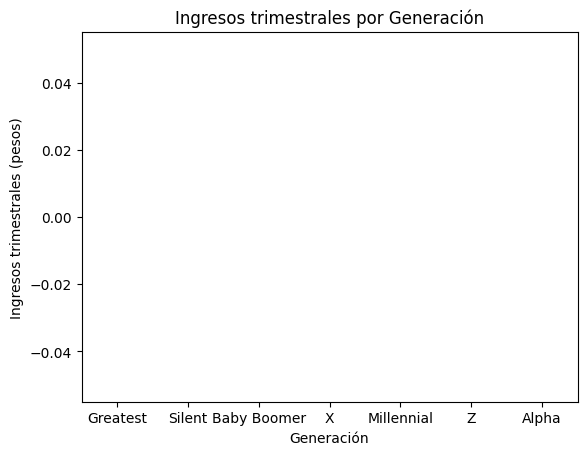

In [266]:
df=df_2016[en_sonora(df_2016)&casados(df_2016)]
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/1928979297.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


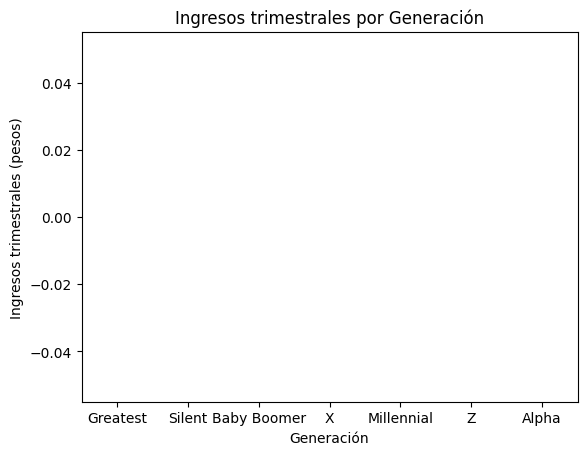

In [267]:
df=df_2016[en_sonora(df_2016)&divorciados(df_2016)]
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

### 2018

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/4192664842.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)['ing_tri_individual_total'].mean()


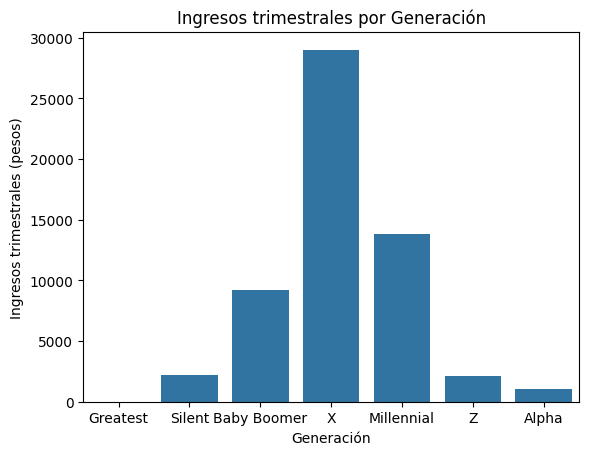

In [268]:
df=df_2018[en_sonora(df_2018)]
generacion=df.groupby('generacion',as_index=False)['ing_tri_individual_total'].mean()
sns.barplot(x='generacion', y='ing_tri_individual_total', data=generacion)

# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/4264725152.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


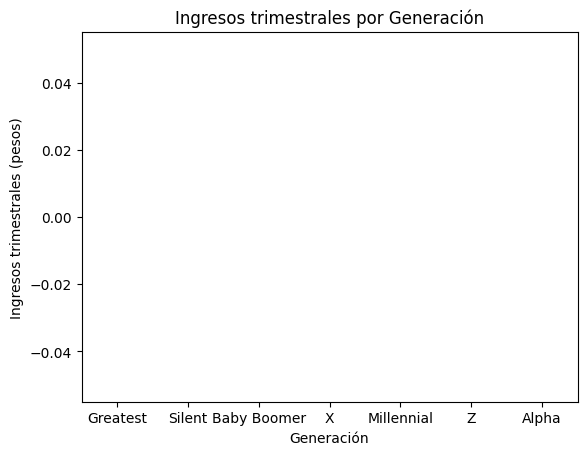

In [269]:
df=df_2016[en_sonora(df_2016)&casados(df_2016)]
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/3896054898.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


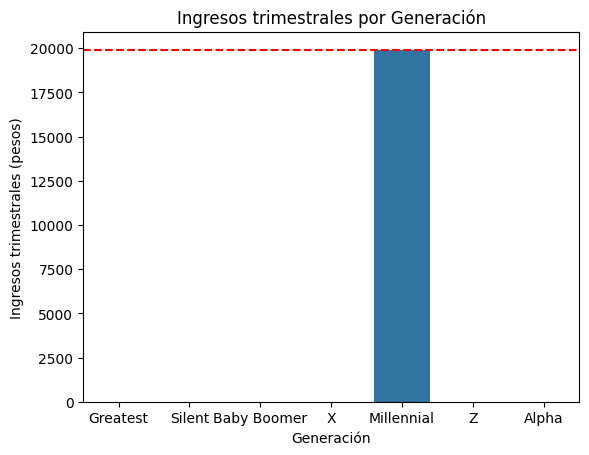

In [270]:
df=df_2018[en_sonora(df_2018)&divorciados(df_2018)]
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

### 2020

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/566345392.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


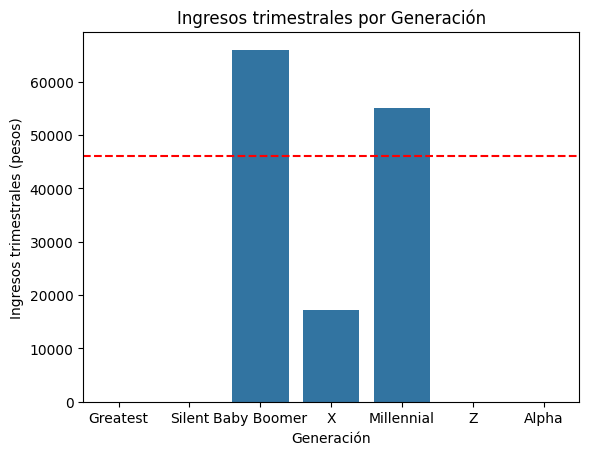

In [271]:
df=df_2020[en_sonora(df_2020)&casados(df_2020)]
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/65067273.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


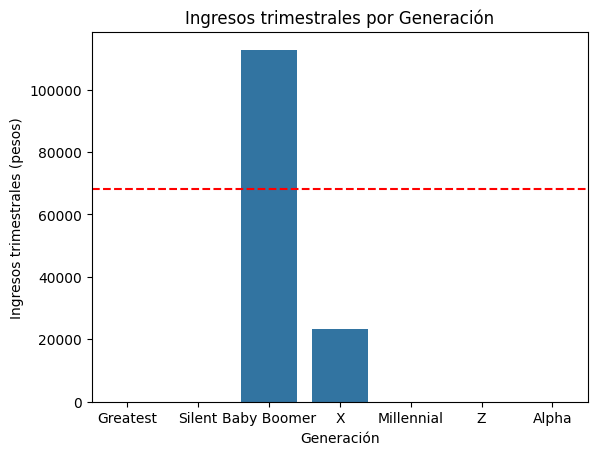

In [272]:
df=df_2020[en_sonora(df_2020)&divorciados(df_2020)]
valor='ing_tri_individual_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = generacion[valor].mean()
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Ingresos trimestrales por Generación')
plt.xlabel('Generación')
plt.ylabel('Ingresos trimestrales (pesos)')
plt.show()

## ¿Cantidad de integrantes en hogar por generacion

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_1973/1351724310.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


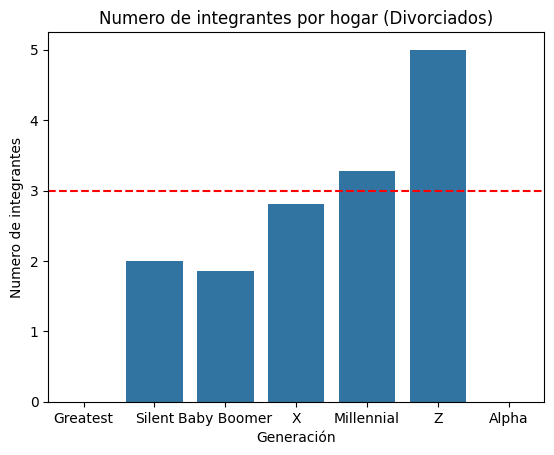

In [16]:
df=df_2022
df=df[en_sonora(df)&divorciados(df)]
valor='integrantes'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = round(generacion[valor].mean())
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Numero de integrantes por hogar (Divorciados)')
plt.xlabel('Generación')
plt.ylabel('Numero de integrantes')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/1647658687.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


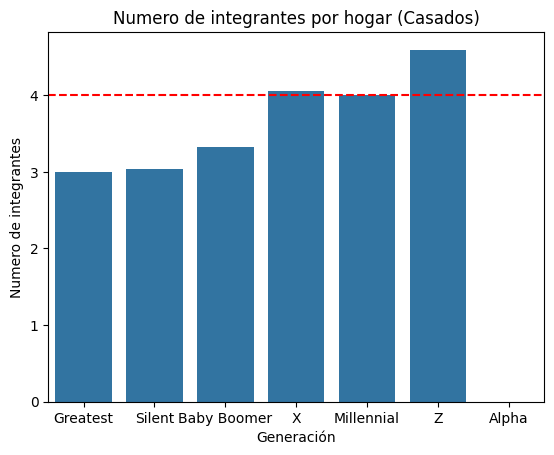

In [ ]:
df=df_2022
df=df[en_sonora(df)&casados(df)]
valor='integrantes'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = round(generacion[valor].mean())
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Numero de integrantes por hogar (Casados)')
plt.xlabel('Generación')
plt.ylabel('Numero de integrantes')
plt.show()

## Ingreso Trimestral Por Hogar

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_1973/4025783585.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


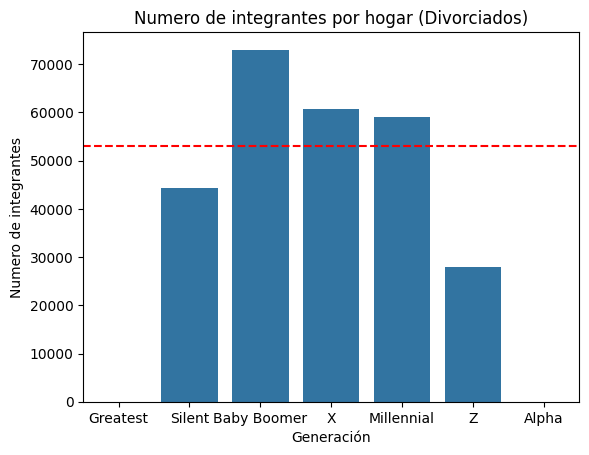

In [11]:
df=df_2022
df=df[en_sonora(df)&divorciados(df)]
valor='ing_tri_hogar_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = round(generacion[valor].mean())
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Numero de integrantes por hogar (Divorciados)')
plt.xlabel('Generación')
plt.ylabel('Numero de integrantes')
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_22422/3196299771.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  generacion=df.groupby('generacion',as_index=False)[valor].mean()


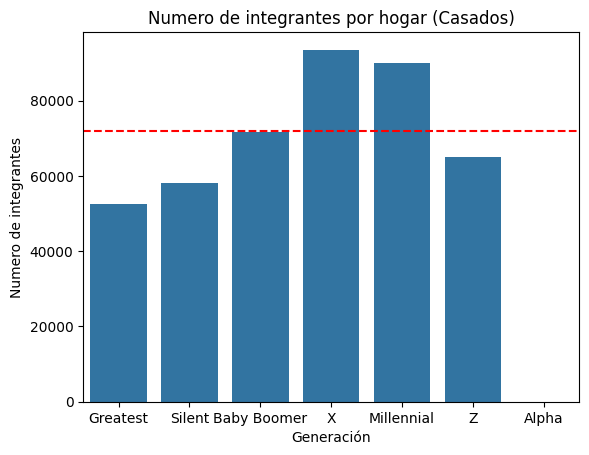

In [ ]:
df=df_2022
df=df[en_sonora(df)&casados(df)]
valor='ing_tri_hogar_total'

generacion=df.groupby('generacion',as_index=False)[valor].mean()
sns.barplot(x='generacion', y=valor, data=generacion)
valor_promedio = round(generacion[valor].mean())
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
# Mostrar el gráfico
plt.title('Numero de integrantes por hogar (Casados)')
plt.xlabel('Generación')
plt.ylabel('Numero de integrantes')
plt.show()

In [66]:
def en_sonora(df):
    en_sonora= (df['folioviv']>=2600000000)&(df['folioviv']<2700000000)
    return en_sonora

def casados(df):
    if isinstance(df['edo_conyug'], (int, float, complex)):
        casados=df['edo_conyug']==2
    else:
        casados=df['edo_conyug']=='2'
    return casados

def divorciados(df):
    if isinstance(df['edo_conyug'], (int, float, complex)):
        divorciados=df['edo_conyug']==4
    else:
        divorciados=df['edo_conyug']=='4'
    return divorciados 

In [48]:
df_2022=pd.read_csv("datos_finales/2022.csv")

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_1973/4202579363.py:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv("datos_finales/2022.csv")


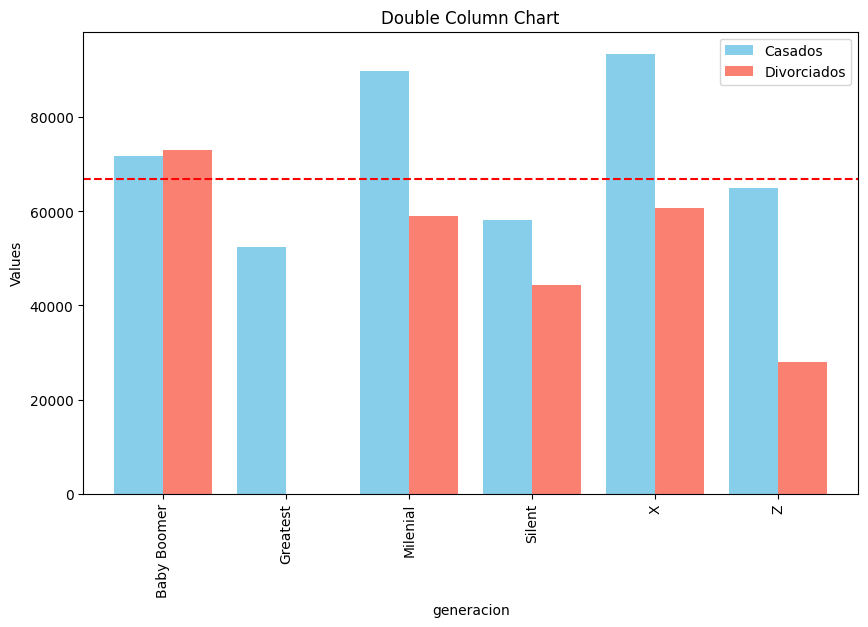

In [64]:
df=df_2022
casados=df[en_sonora(df)&casados(df)]
divorciados=df[en_sonora(df)&divorciados(df)]
valor='ing_tri_hogar_total'

generacion_casados=casados.groupby('generacion',as_index=True)[valor].mean()
generacion_divorciados=divorciados.groupby('generacion',as_index=True)[valor].mean()

valor_promedio = df[valor].mean()


generacion = pd.DataFrame({
    'Casados': generacion_casados,
    'Divorciados': generacion_divorciados
})

# Plot with Pandas
ax = generacion.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
ax.set_ylabel('Values')
ax.set_title('Double Column Chart')
plt.show()

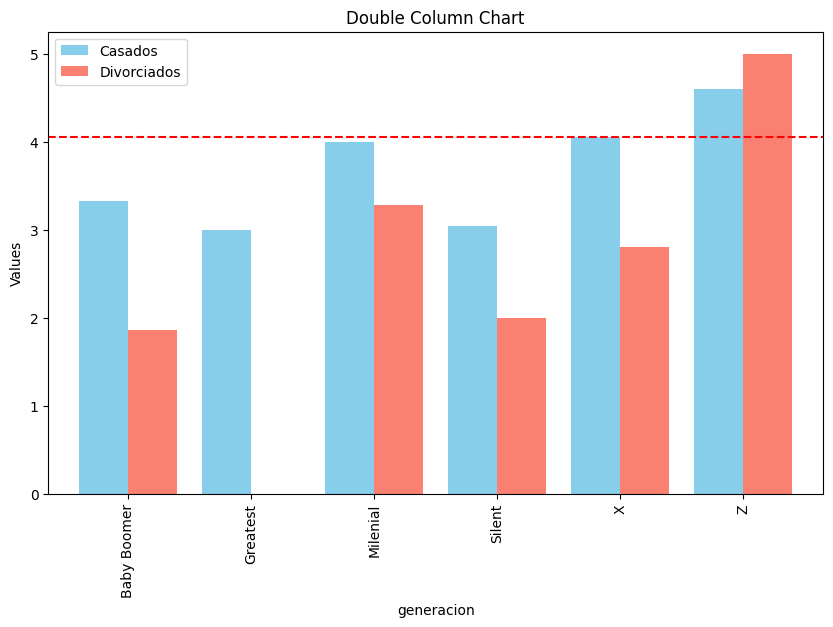

In [67]:
df=df_2022
casados=df[en_sonora(df)&casados(df)]
divorciados=df[en_sonora(df)&divorciados(df)]
valor='integrantes'

generacion_casados=casados.groupby('generacion',as_index=True)[valor].mean()
generacion_divorciados=divorciados.groupby('generacion',as_index=True)[valor].mean()

valor_promedio = df[valor].mean()


generacion = pd.DataFrame({
    'Casados': generacion_casados,
    'Divorciados': generacion_divorciados
})

# Plot with Pandas
ax = generacion.plot(kind='bar', width=0.8, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.axhline(valor_promedio, color='red', linestyle='--', label='Promedio Global')
ax.set_ylabel('Values')
ax.set_title('Double Column Chart')
plt.show()

In [53]:
df_2022=pd.read_csv("datos_finales/2022.csv")

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_1973/4202579363.py:1: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv("datos_finales/2022.csv")


In [54]:
df_2022.columns[:60]

Index(['Unnamed: 0', 'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo',
       'edad', 'madre_hog', 'madre_id', 'padre_hog', 'padre_id', 'disc_camin',
       'disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest',
       'disc_habla', 'disc_acti', 'cau_camin', 'cau_ver', 'cau_brazo',
       'cau_apren', 'cau_oir', 'cau_vest', 'cau_habla', 'cau_acti', 'hablaind',
       'lenguaind', 'hablaesp', 'comprenind', 'etnia', 'alfabetism',
       'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
       'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
       'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id',
       'segsoc', 'ss_aa', 'ss_mm', 'redsoc_1', 'redsoc_2', 'redsoc_3',
       'redsoc_4', 'redsoc_5', 'redsoc_6', 'hor_1'],
      dtype='object')

In [60]:
columns=[
    'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo',
       'edad',
        'residencia', 'edo_conyug', 'conyuge_id',
        'entidad',
       'integrantes', 'año_nacimiento', 'generacion', 'index', 'gasto_tri',
       'ing_tri', 'clave', 'numero_de_ingresos_hogar', 'ing_tri_hogar_total',
       'generacion_conyuge', 'delta'

]

In [61]:
df=df_2022[columns]
df

,folioviv,foliohog,numren,parentesco,sexo,edad,residencia,edo_conyug,conyuge_id,entidad,...,año_nacimiento,generacion,index,gasto_tri,ing_tri,clave,numero_de_ingresos_hogar,ing_tri_hogar_total,generacion_conyuge,delta
0,100005002,1,1,101,2,91,01,5,,1,...,1931,Silent,0,32776.89,7434.78,P104,5,44510.85,No se sabe,No se sabe
1,100005002,1,2,301,2,48,01,6,,1,...,1974,X,0,32776.89,33749.99,P001,5,44510.85,No se sabe,No se sabe
2,100005002,1,2,301,2,48,01,6,,1,...,1974,X,0,32776.89,1956.52,P009,5,44510.85,No se sabe,No se sabe
3,100005002,1,3,609,2,13,01,6,,1,...,2009,Z,0,32776.89,391.30,P037,5,44510.85,No se sabe,No se sabe
4,100005002,1,3,609,2,13,01,6,,1,...,2009,Z,0,32776.89,978.26,P041,5,44510.85,No se sabe,No se sabe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397177,3260797908,1,2,201,2,50,32,2,01,32,...,1972,X,88819,13198.75,2543.47,P001,3,14869.54,X,0
397178,3260797909,1,1,101,1,37,32,2,02,32,...,1985,Milenial,88820,18702.34,26413.04,P001,1,26413.04,No se sabe,No se sabe
397179,3260797910,1,1,101,1,63,32,2,02,32,...,1959,Baby Boomer,88821,117455.55,136709.99,P069,1,136709.99,No se sabe,No se sabe
397180,3260797912,1,1,101,1,29,32,2,02,32,...,1993,Milenial,88822,30166.09,24358.69,P070,2,38739.12,Milenial,0


In [62]:
df.to_csv("datos_finales/2022_final.csv")

In [55]:
df_2022.columns[60:120]

Index(['min_1', 'usotiempo1', 'hor_2', 'min_2', 'usotiempo2', 'hor_3', 'min_3',
       'usotiempo3', 'hor_4', 'min_4', 'usotiempo4', 'hor_5', 'min_5',
       'usotiempo5', 'hor_6', 'min_6', 'usotiempo6', 'hor_7', 'min_7',
       'usotiempo7', 'hor_8', 'min_8', 'usotiempo8', 'pop_insabi', 'atemed',
       'inst_1', 'inst_2', 'inst_3', 'inst_4', 'inst_5', 'inst_6', 'inscr_1',
       'inscr_2', 'inscr_3', 'inscr_4', 'inscr_5', 'inscr_6', 'inscr_7',
       'inscr_8', 'prob_anio', 'prob_mes', 'prob_sal', 'aten_sal', 'servmed_1',
       'servmed_2', 'servmed_3', 'servmed_4', 'servmed_5', 'servmed_6',
       'servmed_7', 'servmed_8', 'servmed_9', 'servmed_10', 'servmed_11',
       'servmed_12', 'hh_lug', 'mm_lug', 'hh_esp', 'mm_esp', 'pagoaten_1'],
      dtype='object')

In [56]:
df_2022.columns[120:]

Index(['pagoaten_2', 'pagoaten_3', 'pagoaten_4', 'pagoaten_5', 'pagoaten_6',
       'pagoaten_7', 'noatenc_1', 'noatenc_2', 'noatenc_3', 'noatenc_4',
       'noatenc_5', 'noatenc_6', 'noatenc_7', 'noatenc_8', 'noatenc_9',
       'noatenc_10', 'noatenc_11', 'noatenc_12', 'noatenc_13', 'noatenc_14',
       'noatenc_15', 'noatenc_16', 'norecib_1', 'norecib_2', 'norecib_3',
       'norecib_4', 'norecib_5', 'norecib_6', 'norecib_7', 'norecib_8',
       'norecib_9', 'norecib_10', 'norecib_11', 'norecib_12', 'razon_1',
       'razon_2', 'razon_3', 'razon_4', 'razon_5', 'razon_6', 'razon_7',
       'razon_8', 'razon_9', 'razon_10', 'razon_11', 'diabetes', 'pres_alta',
       'peso', 'segvol_1', 'segvol_2', 'segvol_3', 'segvol_4', 'segvol_5',
       'segvol_6', 'segvol_7', 'hijos_viv', 'hijos_mue', 'hijos_sob',
       'trabajo_mp', 'motivo_aus', 'act_pnea1', 'act_pnea2', 'num_trabaj',
       'c_futuro', 'ct_futuro', 'entidad', 'est_dis', 'upm', 'factor',
       'integrantes', 'año_nacimiento', 